In [2]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [6]:
df['society'] = round((df['ppltrst'] + df['pplfair'] + df['pplhlp'])/3)

In [8]:
df = df.drop(columns=['idno','pplfair','ppltrst','pplhlp','cntry']).head()
df.head()

,year,tvtot,happy,sclmeet,sclact,gndr,agea,partner,society
0,6,3.0,8.0,5.0,4.0,2.0,60.0,1.0,6.0
1,6,6.0,9.0,3.0,2.0,2.0,59.0,1.0,6.0
2,6,1.0,7.0,6.0,3.0,1.0,24.0,2.0,8.0
3,6,4.0,10.0,6.0,2.0,2.0,64.0,1.0,6.0
4,6,5.0,8.0,7.0,2.0,2.0,55.0,1.0,6.0


In [10]:
y=df['partner']
X=df.loc[:,~df.columns.isin(['partner'])]

offset = int(X.shape[0] *0.9)

X_train,y_train = X[:offset], y[:offset]
X_test,y_test = X[offset:], y[offset:]

In [15]:
params ={'n_estimators':500, 'max_depth':2, 'loss':'deviance'}

clf=ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train,y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

clf.score(X_test,y_test)

1.0

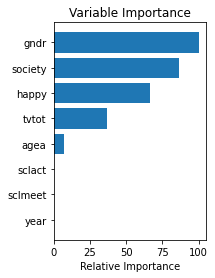

In [16]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()